<a href="https://www.kaggle.com/code/mesutssmn/bbc-nlp-ml-ann-models?scriptVersionId=171575823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-11 21:11:18.296940: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 21:11:18.297061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 21:11:18.579903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv('/kaggle/input/bbc-full-text-document-classification/bbc_data.csv')
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [3]:
df[df.labels == "entertainment"].data[3]

'Snicket tops US box office chart  The film adaptation of Lemony Snicket novels has topped the North America box office chart, displacing Oceans 12.  A Series of Unfortunate Events, starring Jim Carrey, took $30.2m (xc2xa315.5m) in its debut weekend. Oceans 12 fell to number two while new entry Spanglish entered the chart at number three, taking $9m (xc2xa34.6m). A Series of Unfortunate Events also stars Scottish comedian Billy Connelly, while Carrey takes on a number of different roles in the surreal film. The only other new entry in the top 10 was re-make, Flight of the Phoenix, at number eight, starring Dennis Quaid. Carrey entertained crowds at the UK premiere of Lemony Snicket in London on Friday. The actor grabbed co-star Meryl Streep and whisked her around Leicester Square. Based on the cult childrens books by author Daniel Handler, the film follows three children who are orphaned when their parents die in a fire. They are taken in by their wicked uncle Count Olaf, played by Car

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.labels.unique()

array(['entertainment', 'business', 'sport', 'politics', 'tech'],
      dtype=object)

In [6]:
df.labels = df.labels.map({'entertainment':0, 'business':1, 'sport':2, 'politics':3, 'tech':4})

In [7]:
df.labels

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: labels, Length: 2225, dtype: int64

In [8]:
df.data=df.data.str.lower()

In [9]:
puncs=string.punctuation

In [10]:
for punc in puncs:
    df.data=df.data.str.replace(punc,"")

In [11]:
df.data

0       musicians to tackle us red tape  musicians gro...
1       u2s desire to be number one  u2 who have won t...
2       rocker doherty in onstage fight  rock singer p...
3       snicket tops us box office chart  the film ada...
4       oceans twelve raids box office  oceans twelve ...
                              ...                        
2220    warning over windows word files  writing a mic...
2221    fast lifts rise into record books  two highspe...
2222    nintendo adds media playing to ds  nintendo is...
2223    fast moving phone viruses appear  security fir...
2224    hacker threat to apples itunes  users of apple...
Name: data, Length: 2225, dtype: object

In [12]:
y = df['labels']
X = df.drop('labels', axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train

,data
447,s korea spending boost to economy south korea...
1255,bristol city 21 milton keynes leroy lita took...
1342,edgy agassi struggles past dent andre agassi ...
1761,more to do on adult literacy the government w...
1263,gatlin and hayes win owen awards american oly...
...,...
1638,labours cunningham to stand down veteran labo...
1095,collins to compete in birmingham world and co...
1130,juninho demand for oneill talks juninhos agen...
1294,wenger shock at newcastle dip arsenal manager...


In [15]:
c_vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

X_train_vector = c_vectorizer.fit_transform(X_train['data'])
X_test_vector = c_vectorizer.transform(X_test['data'])

# RF

In [16]:
rf=RandomForestClassifier()
modelRF=rf.fit(X_train_vector,y_train)
modelRF.score(X_test_vector,y_test)

0.9515260323159784

In [17]:
params = [{'n_estimators': [10, 20, 30, 40],
         'max_depth': [3,5,7,12],
         'min_samples_split': [5,7,9,13]}]

In [18]:
#cv=GridSearchCV(rf,params,cv=5,n_jobs=-1)
#cv.fit(X_train_vector,y_train)
#cv.best_params_

In [19]:
cvr=RandomForestClassifier(max_depth = 12, min_samples_split = 9, n_estimators = 40)

In [20]:
cvr.fit(X_train_vector,y_train)
cvr.score(X_test_vector,y_test)

0.8527827648114902

In [21]:
rf_pred = cvr.predict(X_test_vector)
rf_pred

array([1, 1, 3, 1, 2, 1, 3, 2, 1, 2, 0, 1, 3, 2, 1, 1, 4, 1, 2, 3, 0, 3,
       0, 1, 1, 2, 1, 3, 2, 3, 3, 2, 4, 1, 3, 1, 1, 3, 4, 3, 1, 2, 2, 3,
       4, 4, 4, 1, 0, 4, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1,
       2, 0, 2, 3, 2, 2, 4, 3, 2, 3, 3, 1, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2,
       1, 3, 2, 0, 2, 0, 3, 0, 1, 1, 3, 2, 0, 2, 4, 2, 2, 2, 3, 4, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 4, 4, 4, 1, 0, 1, 3, 1,
       1, 2, 3, 2, 0, 0, 1, 4, 1, 2, 2, 2, 4, 1, 4, 1, 1, 2, 3, 1, 1, 4,
       4, 1, 2, 1, 0, 1, 4, 1, 1, 2, 4, 1, 2, 4, 4, 1, 2, 3, 4, 1, 3, 4,
       2, 2, 1, 2, 2, 3, 2, 2, 4, 3, 1, 1, 4, 2, 0, 2, 1, 4, 4, 1, 2, 2,
       3, 4, 2, 1, 4, 4, 0, 2, 2, 2, 2, 3, 3, 2, 4, 1, 3, 2, 4, 4, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 2, 3, 1, 3, 2, 1, 2, 4, 3, 1, 0, 1, 2, 3, 1,
       2, 3, 0, 0, 2, 2, 3, 0, 2, 3, 4, 0, 1, 3, 1, 3, 3, 3, 2, 1, 2, 1,
       1, 1, 2, 3, 1, 1, 1, 3, 2, 1, 0, 3, 2, 2, 4, 2, 0, 4, 2, 3, 1, 4,
       2, 3, 1, 4, 0, 4, 0, 1, 2, 2, 0, 4, 1, 4, 3,

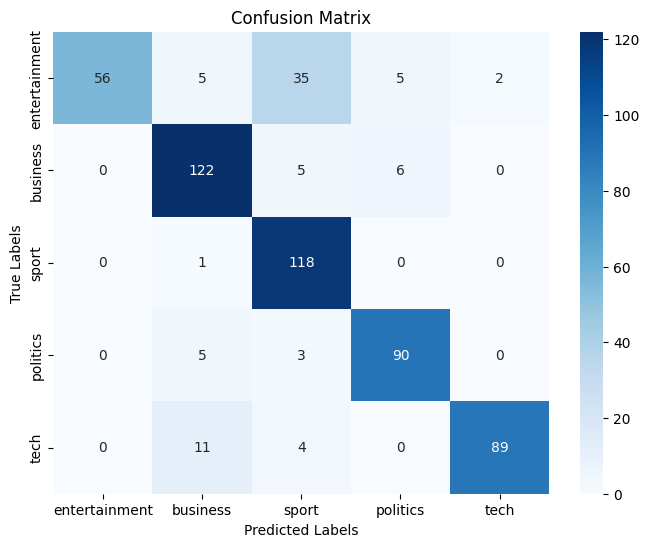

In [22]:
cm = confusion_matrix(y_test, rf_pred)

# Define class labels
class_labels = ['entertainment', 'business','sport','politics','tech']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XGB

In [23]:
params = [{'n_estimators': [100, 200, 500, 1000],
         'max_depth': [3,12],
         'learning_rate': [0.02,0.03,0.2,0.3]}]

In [24]:
xgb = XGBClassifier(device="cuda")

In [25]:
#gsxg=GridSearchCV(xgb,params,cv=3,n_jobs=-1)
#gsxg.fit(X_train_vector,y_train)
#gsxg.best_params_

In [26]:
cvx = XGBClassifier(max_depth = 3, learning_rate =0.03, n_estimators = 200)

In [27]:
cvx.fit(X_train_vector,y_train)
cvx.score(X_test_vector,y_test)

0.947935368043088

In [28]:
xgb_pred = cvx.predict(X_test_vector)
xgb_pred

array([1, 1, 3, 1, 2, 3, 3, 2, 1, 2, 0, 1, 3, 0, 1, 1, 4, 1, 0, 1, 0, 3,
       0, 1, 0, 2, 1, 3, 2, 3, 3, 2, 4, 1, 0, 1, 1, 3, 4, 3, 4, 2, 0, 3,
       4, 4, 4, 1, 0, 4, 1, 1, 2, 0, 1, 2, 2, 2, 3, 0, 0, 1, 1, 0, 3, 1,
       0, 0, 2, 3, 2, 2, 4, 3, 0, 3, 3, 1, 0, 0, 3, 3, 0, 1, 1, 3, 3, 2,
       1, 3, 2, 0, 2, 0, 3, 0, 1, 1, 0, 2, 0, 2, 4, 0, 2, 2, 3, 4, 1, 2,
       1, 4, 1, 0, 2, 2, 4, 1, 1, 2, 1, 2, 0, 2, 1, 4, 4, 1, 0, 1, 3, 1,
       1, 2, 3, 2, 0, 0, 1, 4, 1, 0, 2, 0, 4, 1, 4, 1, 0, 2, 3, 1, 4, 4,
       2, 4, 2, 1, 0, 1, 4, 1, 1, 2, 4, 1, 0, 4, 4, 1, 2, 3, 4, 2, 3, 4,
       2, 2, 1, 2, 2, 3, 0, 2, 4, 3, 1, 3, 4, 1, 0, 2, 1, 4, 4, 1, 2, 2,
       3, 4, 2, 1, 0, 4, 0, 2, 2, 2, 2, 3, 3, 2, 4, 1, 3, 2, 4, 4, 0, 1,
       0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 3, 3, 1, 2, 4, 3, 1, 0, 4, 0, 3, 1,
       2, 3, 0, 0, 0, 0, 3, 2, 2, 3, 4, 0, 1, 2, 1, 3, 3, 3, 2, 4, 0, 1,
       3, 1, 2, 3, 1, 1, 1, 0, 0, 1, 0, 3, 1, 2, 4, 0, 0, 4, 0, 3, 1, 4,
       2, 3, 1, 4, 0, 4, 0, 1, 2, 0, 0, 4, 1, 4, 3,

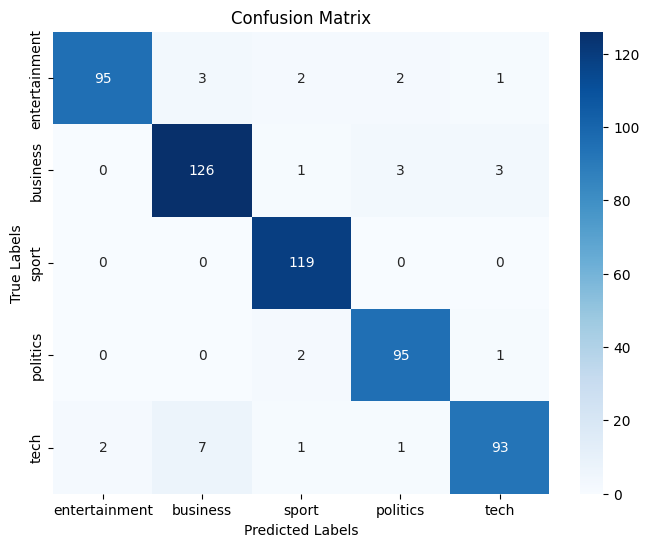

In [29]:
cm = confusion_matrix(y_test, xgb_pred)

# Define class labels
class_labels = ['entertainment', 'business','sport','politics','tech']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# LGBM

In [30]:
X_train_vector = X_train_vector.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test_vector = X_train_vector.astype(np.float32)
y_test = y_train.astype(np.float32)

In [31]:
lgb = LGBMClassifier(verbose=-1, device = "gpu")
modelLGB = lgb.fit(X_train_vector,y_train)
modelLGB.score(X_test_vector,y_test)

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


1.0

In [32]:
params = [{'n_estimators': [500, 1000],
         'max_depth': [5,7],
         'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06]}]

In [33]:
#lgbgs=GridSearchCV(lgb,params,cv=3,n_jobs=-1)
#lgbgs.fit(X_train_vector,y_train)
#lgbgs.best_params_

In [34]:
cvl = LGBMClassifier(learning_rate = 0.04, max_depth = 7, min_samples_split = 5, n_estimators = 1000, verbose=-1, device = "gpu")
cvl.fit(X_train_vector,y_train)
cvl.score(X_test_vector,y_test)

1.0

In [35]:
lgb_pred = cvl.predict(X_test_vector)
lgb_pred

array([1., 2., 2., ..., 2., 2., 1.], dtype=float32)

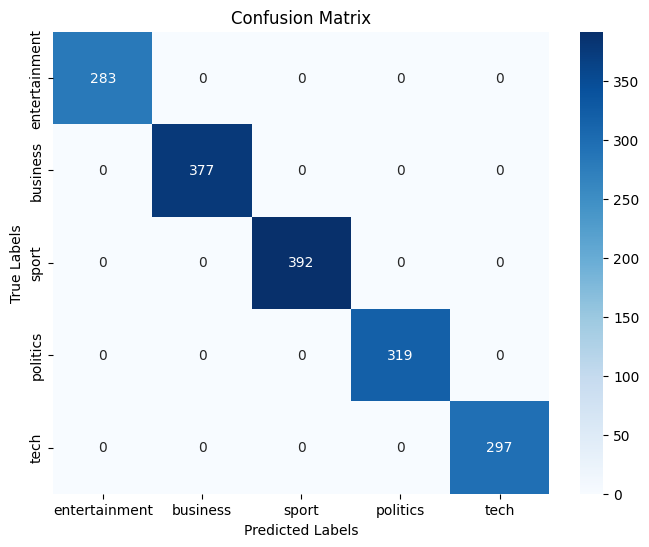

In [36]:
cm = confusion_matrix(y_test, lgb_pred)

# Define class labels
class_labels = ['entertainment', 'business','sport','politics','tech']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ANN

In [37]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train_vector.shape[1],), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │    74,860,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,871,845 (285.61 MB)

 Trainable params: 74,871,589 (285.61 MB)

 Non-trainable params: 256 (1.00 KB)

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=3,
    min_delta=0.01,
    restore_best_weights=True,
)

In [39]:
X_train_vector,y_test

(<1668x584845 sparse matrix of type '<class 'numpy.float32'>'
 	with 895850 stored elements in Compressed Sparse Row format>,
 447     1.0
 1255    2.0
 1342    2.0
 1761    3.0
 1263    2.0
        ... 
 1638    3.0
 1095    2.0
 1130    2.0
 1294    2.0
 860     1.0
 Name: labels, Length: 1668, dtype: float32)

In [40]:
history = model.fit(X_train_vector.toarray(), y_train, epochs=10, callbacks=[early_stopping])

Epoch 1/10
 3/53 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.1562 - loss: 1.6826

I0000 00:00:1712870080.030395      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712870080.053872      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.5636 - loss: 1.1353
Epoch 2/10
 1/53 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.8438 - loss: 0.5746

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9132 - loss: 0.4363
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9823 - loss: 0.0592
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9945 - loss: 0.0245
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9954 - loss: 0.0215
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9993 - loss: 0.0060
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 1.0000 - loss: 0.0010    


<Axes: title={'center': 'Accuracy'}>

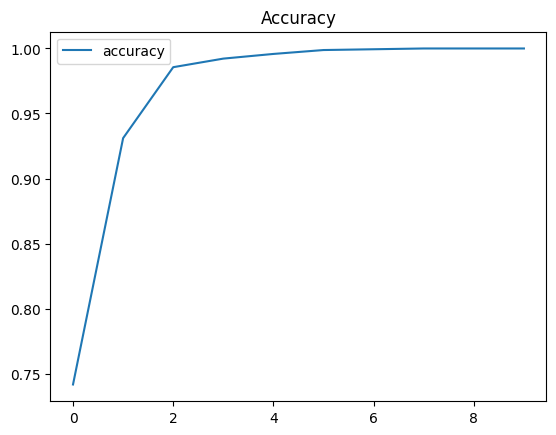

In [41]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy']].plot(title="Accuracy")

In [42]:
predicted = model.predict(X_test_vector.toarray())
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

 7/53 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

W0000 00:00:1712870120.214657      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


array([1, 2, 2, ..., 2, 2, 1])

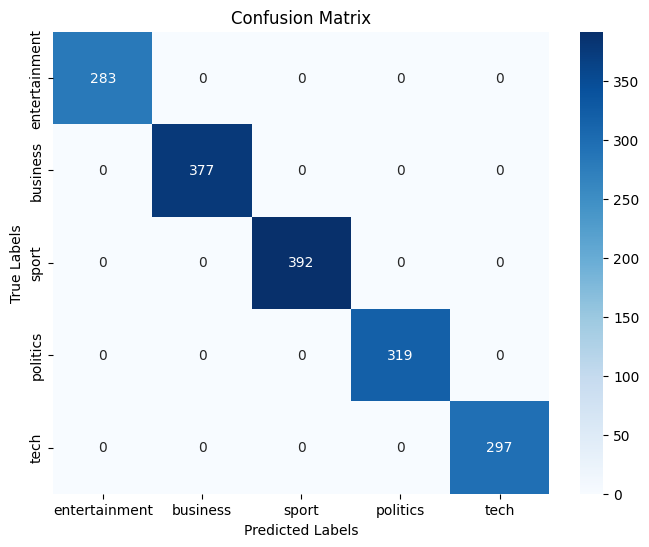

In [43]:
cm = confusion_matrix(y_test, predicted_classes)

# Define class labels
class_labels = ['entertainment', 'business','sport','politics','tech']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Example 1

In [44]:
prediction_paragraph = ["In a heart-stopping finale to the World Cup tournament, Argentina emerged victorious after a thrilling penalty shootout against their formidable opponents. The match, which had the entire world on the edge of their seats, showcased the resilience and skill of both teams as they battled it out for football's most coveted trophy. From the mesmerizing dribbles to the acrobatic saves, every moment of the game was filled with tension and drama. In the end, it was Argentina's unwavering determination and sheer grit that saw them clinch victory, sending their fans into jubilant celebrations across the globe. This historic win not only brings glory to Argentina but also cements their place in football history, serving as a testament to the passion and dedication of the players and fans alike."]

In [45]:
dfd = pd.DataFrame()

In [46]:
dfd["prediction_paragraph"] = prediction_paragraph

In [47]:
dfd_vector = c_vectorizer.transform(dfd["prediction_paragraph"]).astype(np.float64)

In [48]:
print(dfd_vector.shape)

(1, 584845)


In [49]:
predicted = model.predict(dfd_vector.toarray())
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


array([2])

As you can see it gives the sport label as an answer which is true.

# Example 2

In [50]:
prompt = ["Snicket tops US box office chart  The film adaptation of Lemony Snicket novels has topped the North America box office chart, displacing Oceans 12.  A Series of Unfortunate Events, starring Jim Carrey, took $30.2m (xc2xa315.5m) in its debut weekend. Oceans 12 fell to number two while new entry Spanglish entered the chart at number three, taking $9m (xc2xa34.6m). A Series of Unfortunate Events also stars Scottish comedian Billy Connelly, while Carrey takes on a number of different roles in the surreal film. The only other new entry in the top 10 was re-make, Flight of the Phoenix, at number eight, starring Dennis Quaid. Carrey entertained crowds at the UK premiere of Lemony Snicket in London on Friday. The actor grabbed co-star Meryl Streep and whisked her around Leicester Square. Based on the cult childrens books by author Daniel Handler, the film follows three children who are orphaned when their parents die in a fire. They are taken in by their wicked uncle Count Olaf, played by Carrey, who schemes to get his hands on their fortune."]

In [51]:
dfd["prompt"] = prompt

In [52]:
prompt_vec = c_vectorizer.transform(dfd["prompt"]).astype(np.float64)

In [53]:
predicted = model.predict(prompt_vec.toarray())
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([0])